## 1. Setting up LangGraph

Let's start by importing the necessary modules and setting up our environment:

In [1]:
import os
from typing import Dict, TypedDict,List
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph, END
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Set up the Groq LLM
llm = ChatGroq(
        model_name="llama-3.1-70b-versatile",
        temperature=0.1,
        model_kwargs={"top_p": 0.5, "seed": 1337}
    )
# Define our state structure
class State(TypedDict):
    messages: List[BaseMessage]
    next_step: str

## 2. Creating your first LangGraph flow

Let's create a simple conversational agent using LangGraph. This agent will greet the user, ask for their name, and then provide a personalized response.

In [2]:
# Define our graph
workflow = StateGraph(State)

# Define our nodes
def greet(state: State) -> State:
    state["messages"].append({"role": "assistant", "content": "Hello! What's your name?"})
    state["next_step"] = "get_name"
    return state

def get_name(state: State) -> State:
    name = state["messages"][-1]["content"]
    state["messages"].append({"role": "assistant", "content": f"Nice to meet you, {name}! How can I assist you today?"})
    state["next_step"] = "end"
    return state

# Add nodes to the graph
workflow.add_node("greet", greet)
workflow.add_node("get_name", get_name)

# Define edges
workflow.set_entry_point("greet")
workflow.add_edge("greet", "get_name")
workflow.add_edge("get_name", END)

# Compile the graph
app = workflow.compile()

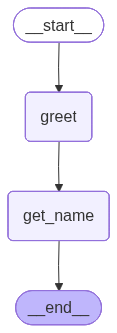

In [3]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

Now that we have created our simple LangGraph flow, let's test it:

In [4]:
# Initialize the state
initial_state = {"messages": [],"next_step":""}
# Run the graph
for event in app.stream(initial_state):
    for output in event.values():
        if "messages" in output:
            for message in output["messages"]:
                if message["role"] == "assistant":
                    print(f"Assistant: {message['content']}")
                elif message["role"] == "human":
                    print(f"Human: {message['content']}")
    
    # Check if 'next_step' exists
    if "next_step" in output and output["next_step"] == "get_name":
        user_input = input("Your response: ")
        output["messages"].append({"role": "human", "content": user_input})

print("Conversation ended.")


Assistant: Hello! What's your name?
Assistant: Hello! What's your name?
Human: Jimi
Assistant: Nice to meet you, Jimi! How can I assist you today?
Conversation ended.


## Conclusion

In this tutorial, we've introduced LangGraph and created a simple conversational flow. We've covered the basic concepts of nodes, edges, and graphs, and demonstrated how to set up a LangGraph workflow.

This is just the beginning of what you can do with LangGraph. In the next tutorial, we'll explore more complex flows, including branching logic and integration with LangChain components.